In [19]:
%matplotlib inline

In [2]:
import numpy as np
import csv
from sklearn.cross_validation import cross_val_score
import matplotlib
from  matplotlib import pyplot as plt
# from sklearn import cross_validation
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn import metrics, preprocessing
import pickle

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.head(5)

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [19]:
x = pd.Series(df['eruptions'])
y = pd.Series(df['waiting'])

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


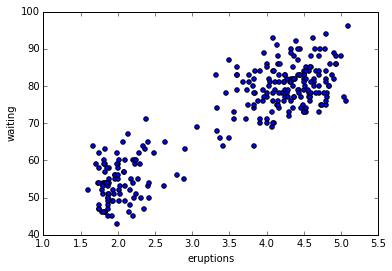

In [20]:
# pd.df.plot.scatter( x='eruptions', y='waiting')
df.plot(kind='scatter', x='eruptions', y='waiting')

In [36]:
# from sklearn.cross_validation import train_test_split
# train, test = train_test_split(df, test_size = 0.2)

In [13]:
from sklearn import datasets
from sklearn.mixture import GaussianMixture as GMM
from sklearn.model_selection import StratifiedKFold

In [38]:
# X = train.as_matrix()

In [39]:
# test = train.as_matrix()

In [49]:
X= df.as_matrix()

In [50]:
X[0:5]

array([[  3.6  ,  79.   ],
       [  1.8  ,  54.   ],
       [  3.333,  74.   ],
       [  2.283,  62.   ],
       [  4.533,  85.   ]])

In [51]:
model = GMM(2, max_iter=100,
                        covariance_type='spherical')

In [52]:
fittedGMM= model.fit(X)

In [53]:
AIC = model.aic(X)
BIC = model.bic(X)

In [54]:
AIC,BIC

(3433.0586604260725, 3458.2992748901443)

In [55]:
fittedGMM.score(X)

-6.28503430225381

In [56]:
fittedGMM

GaussianMixture(covariance_type='spherical', init_params='kmeans',
        max_iter=100, means_init=None, n_components=2, n_init=1,
        precisions_init=None, random_state=None, reg_covar=1e-06,
        tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
        weights_init=None)

In [33]:
print (fittedGMM.means)
# http://www.nehalemlabs.net/prototype/blog/2014/04/03/quick-introduction-to-gaussian-mixture-models-with-python/

AttributeError: 'GaussianMixture' object has no attribute 'means'

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


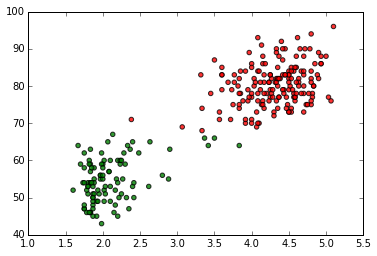

In [57]:
colors = ['r' if i==0 else 'g' for i in fittedGMM.predict(X)]
ax = plt.gca()
ax.scatter(X[:,0], X[:,1], c=colors, alpha=0.8)
plt.show()

In [18]:
# Compute GMM models & AIC/BIC
N = np.arange(1, 14)


def compute_GMM(N, covariance_type='full', n_iter=1000):
    models = [None for n in N]
    for i in range(len(N)):
        print (N[i])
        models[i] = GMM(n_components=N[i], max_iter=n_iter,
                        covariance_type=covariance_type)
        models[i].fit(X)
    return models

models = compute_GMM(N)

AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

i_best = np.argmin(BIC)
gmm_best = models[i_best]
print ("best fit converged:", gmm_best.converged_)
print ("BIC: n_components =  %i" % N[i_best])

# http://www.astroml.org/book_figures/chapter6/fig_EM_metallicity.html


1
2
3
4
5
6
7
8
9
10
11
12
13
best fit converged: True
BIC: n_components =  2


In [22]:
eruptions_bins = 51
waiting_bins = 51
H, eruptions_bins, waiting_bins = np.histogram2d(df['eruptions'], df['waiting'],
                                          (eruptions_bins, waiting_bins))

In [24]:
Xgrid = np.array(map(np.ravel,
                     np.meshgrid(0.5 * (eruptions_bins[:-1]
                                        + waiting_bins[1:]),
                                 0.5 * (eruptions_bins[:-1]
                                        + waiting_bins[1:])))).T
log_dens = gmm_best.score(Xgrid).reshape((51, 51))

TypeError: float() argument must be a string or a number, not 'map'